In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# EDA

In [7]:
df.shape

(244, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
df.sample(10)

,total_bill,tip,sex,smoker,day,time,size
186,20.90,3.50,Female,Yes,Sun,Dinner,3
124,12.48,2.52,Female,No,Thur,Lunch,2
88,24.71,5.85,Male,No,Thur,Lunch,2
150,14.07,2.50,Male,No,Sun,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
143,27.05,5.00,Female,No,Thur,Lunch,6
127,14.52,2.00,Female,No,Thur,Lunch,2
77,27.20,4.00,Male,No,Thur,Lunch,4
213,13.27,2.50,Female,Yes,Sat,Dinner,2


## Explore

In [11]:
df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [12]:
df.groupby('day')[['total_bill', 'tip',	'size']].sum()

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


In [13]:
df2 = df.groupby('day')[['total_bill', 'tip',	'size']].sum() # sum per day
df2.drop('size', inplace=True, axis=1)
df2['percent'] = df2['tip'] / df2['total_bill'] * 100
df2

# in every days almost 15 percent of total bills are paid tips

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


In [14]:
df3 = df.groupby('smoker').sum()
df3['percent'] = df3['tip'] / df3['total_bill'] * 100
df3

# in smokers almost 15 percent of total bills are paid tips

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


In [15]:
df4 = df.groupby(['day','size']).sum()
df4['percent'] = df4['tip'] / df4['total_bill'] * 100
df4.dropna() # drop null values
df4

# in every days and numbers of persons almost 15 percent of total bills are paid tips but in friday with 1 size is 22%

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
     5           0.00    0.00        NaN
     6           0.00    0.00        NaN
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
     6           0.00    0.00        NaN
Sun  1           0.00    0.00        NaN
     2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

In [16]:
df4.describe()

,total_bill,tip,percent
count,24.000000,24.000000,20.000000
mean,201.157083,30.482500,15.280364
std,267.435873,41.348174,2.982730
min,0.000000,0.000000,10.379905
25%,10.257500,1.980000,13.990319
50%,62.405000,7.885000,14.969986
75%,346.667500,48.510000,16.512006
max,892.370000,133.430000,22.377622


## Visualize

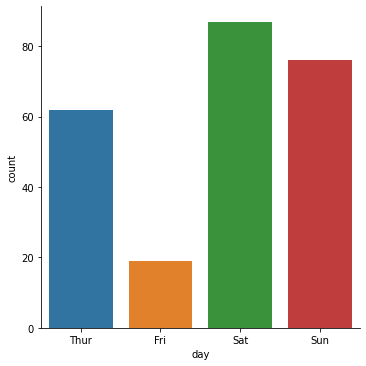

In [17]:
sns.catplot(x='day', kind="count", data=df)

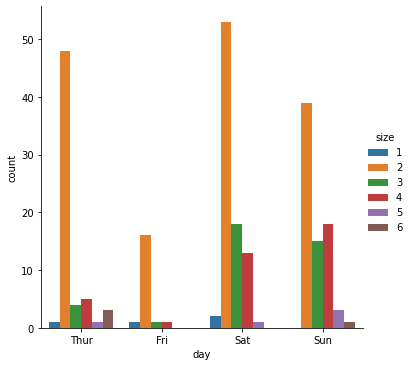

In [18]:
sns.catplot(x='day', hue='size', kind="count", data=df)

# PreProcessing

In [19]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Replace Categorical Data

In [20]:
df.replace({
    'sex':{'Male':0, 'Female':1}, 
    'smoker':{'No':0, 'Yes':1}
     }, inplace=True)
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.00,1,1,Sat,Dinner,2
28,21.70,4.30,0,0,Sat,Dinner,2
162,16.21,2.00,1,0,Sun,Dinner,3
212,48.33,9.00,0,0,Sat,Dinner,4
40,16.04,2.24,0,0,Sat,Dinner,3


### one hot encoding

In [21]:
days = pd.get_dummies(df['day'])
df = pd.concat([df,days], axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun
0,16.99,1.01,1,0,Sun,Dinner,2,0,0,0,1
1,10.34,1.66,0,0,Sun,Dinner,3,0,0,0,1
2,21.01,3.50,0,0,Sun,Dinner,3,0,0,0,1
3,23.68,3.31,0,0,Sun,Dinner,2,0,0,0,1
4,24.59,3.61,1,0,Sun,Dinner,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,0,0,1,0
240,27.18,2.00,1,1,Sat,Dinner,2,0,0,1,0
241,22.67,2.00,0,1,Sat,Dinner,2,0,0,1,0
242,17.82,1.75,0,0,Sat,Dinner,2,0,0,1,0


In [22]:
time = pd.get_dummies(df['time'])
df = pd.concat([df,time], axis=1) # 0 : union , 1 : column 
df

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,1,0,Sun,Dinner,2,0,0,0,1,0,1
1,10.34,1.66,0,0,Sun,Dinner,3,0,0,0,1,0,1
2,21.01,3.50,0,0,Sun,Dinner,3,0,0,0,1,0,1
3,23.68,3.31,0,0,Sun,Dinner,2,0,0,0,1,0,1
4,24.59,3.61,1,0,Sun,Dinner,4,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,0,0,1,0,0,1
240,27.18,2.00,1,1,Sat,Dinner,2,0,0,1,0,0,1
241,22.67,2.00,0,1,Sat,Dinner,2,0,0,1,0,0,1
242,17.82,1.75,0,0,Sat,Dinner,2,0,0,1,0,0,1


In [23]:
df.drop(['day', 'time'], inplace=True, axis=1)

In [24]:
df

,total_bill,tip,sex,smoker,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,1,0,2,0,0,0,1,0,1
1,10.34,1.66,0,0,3,0,0,0,1,0,1
2,21.01,3.50,0,0,3,0,0,0,1,0,1
3,23.68,3.31,0,0,2,0,0,0,1,0,1
4,24.59,3.61,1,0,4,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,3,0,0,1,0,0,1
240,27.18,2.00,1,1,2,0,0,1,0,0,1
241,22.67,2.00,0,1,2,0,0,1,0,0,1
242,17.82,1.75,0,0,2,0,0,1,0,0,1


# Learning

In [25]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'size', 'Thur', 'Fri', 'Sat',
       'Sun', 'Lunch', 'Dinner'],
      dtype='object')

In [26]:
X = df[['sex', 'smoker', 'size', 'Fri', 'Sat','Sun', 'Dinner']]
Y = df[['tip']]

In [27]:
X

,sex,smoker,size,Fri,Sat,Sun,Dinner
0,1,0,2,0,0,1,1
1,0,0,3,0,0,1,1
2,0,0,3,0,0,1,1
3,0,0,2,0,0,1,1
4,1,0,4,0,0,1,1
...,...,...,...,...,...,...,...
239,0,0,3,0,1,0,1
240,1,1,2,0,1,0,1
241,0,1,2,0,1,0,1
242,0,0,2,0,1,0,1


In [28]:
Y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
x_trian, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

In [31]:
x_trian

,sex,smoker,size,Fri,Sat,Sun,Dinner
81,0,0,2,0,0,0,0
181,0,1,2,0,0,1,1
186,1,1,3,0,0,1,1
237,0,1,2,0,1,0,1
198,1,1,2,0,0,0,0
...,...,...,...,...,...,...,...
61,0,1,2,0,1,0,1
143,1,0,6,0,0,0,0
218,0,1,2,0,1,0,1
62,0,1,2,0,1,0,1


In [34]:
regressor = LinearRegression()
regressor.fit(x_trian, y_train)

LinearRegression()

In [35]:
predictions = regressor.predict(x_test)

<AxesSubplot:ylabel='Count'>

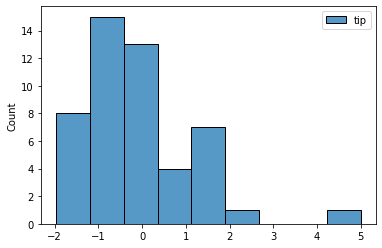

In [36]:
sns.histplot(y_test - predictions)

## Metrics
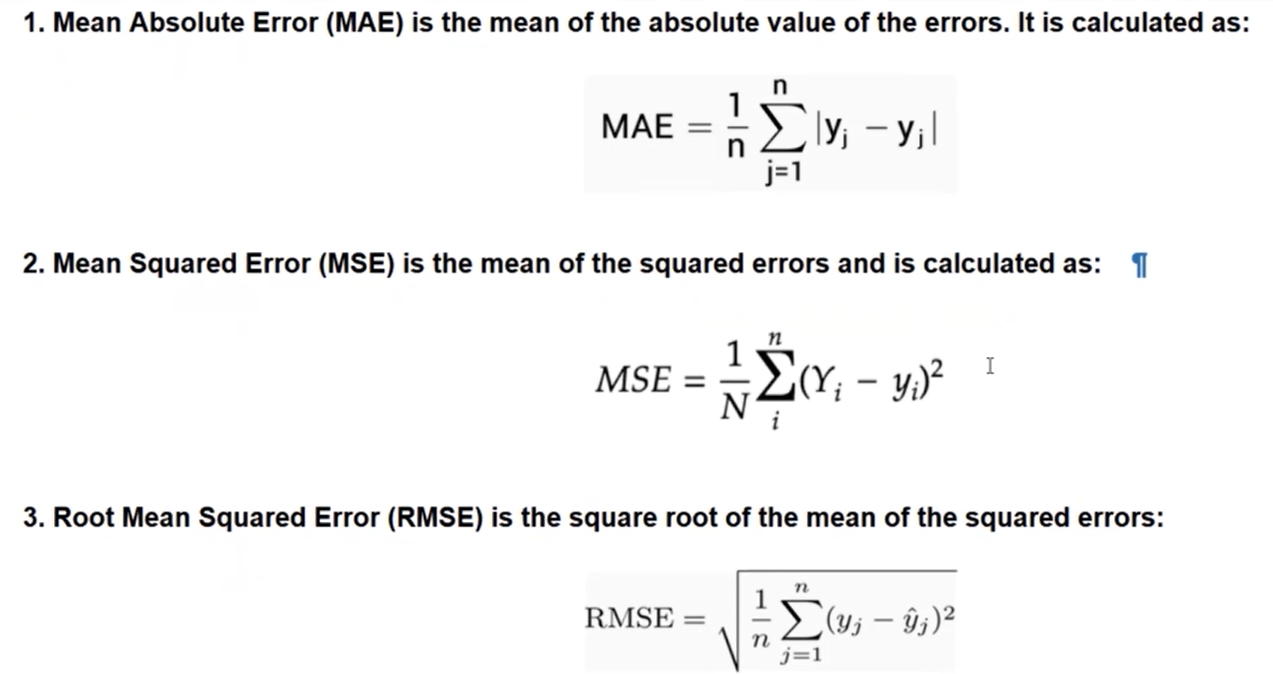

In [51]:
print('mean_absolute_error : ',metrics.mean_absolute_error(y_test, predictions))
print('mean_squared_error : ',metrics.mean_squared_error(y_test, predictions))
print('root_mean_squared_error : ',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

mean_absolute_error :  0.9345801687383195
mean_squared_error :  1.5531987042597772
root_mean_squared_error :  1.2462739282596653


In [39]:
X.sample()

,sex,smoker,size,Fri,Sat,Sun,Dinner
25,0,0,4,0,1,0,1


In [46]:
Y.loc[25]

tip    2.34
Name: 25, dtype: float64

In [42]:
new_customer = np.array([0,	0,	4,	0,	1,	0,	1]).reshape(1,-1) #one row and n columns
new_customer

array([[0, 0, 4, 0, 1, 0, 1]])

In [45]:
regressor.predict(new_customer)

array([[4.00724859]])

By increasing the training data, the bias increases and the variance decreases.